In this era, data has become very important, as it is considered the oil of the 21 century. Data surrounds us from everywhere and all institutions and countries are producing a huge amount of data daily. One of the most exciting fields these days is the field of data science. To be a data scientist,you must have knowledge of statistical concepts and probability, so this notebook will take you on a fun journey to understand probability distributions and how to apply them in real data.
In this notebook we will explain probability distributions and apply it in real dataset.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from scipy import stats 
import matplotlib.pyplot as plt
from empiricaldist import Pmf , Cdf
from matplotlib.ticker import PercentFormatter

We will explain the probability distributions on Boston House , Titanic , athlete_events and police project data.
So, we need to import this data

In [2]:
df_titanic = pd.read_csv('D:/datasets/classification data/train.csv')
df_house = pd.read_csv('D:/datasets/regression/train.csv')
df_police = pd.read_csv('D:/datasets/police_project.csv')
df_olympic = pd.read_csv('D:/datasets/athlete_events.csv')

In [3]:
def label_graph(ticksfont , x_label , y_label , title_label , fontsize):
    
    plt.xticks(fontsize = ticksfont)
    plt.yticks(fontsize = ticksfont)

    plt.xlabel(x_label, fontsize = fontsize)
    plt.ylabel(y_label , fontsize = fontsize)
    plt.title(title_label, fontsize = fontsize)

Probability distributions can be classified into two categories

##### 1- Disceret distributions 

##### 2- Continuous distributions

We will begin by explaining discrete distributions, but first we want to understand three concepts that will help us understand probability distributions. 

These concepts are:

###### 1- Probability Mass Function (PMF)

###### 2- Cumulative distribution function (CMF)

###### 3- Probability Density Function (PDF) 

if We want to know what is the probability of finding a house with a certain number of rooms if we collection this data again or deal with population data based on sample data

We can use PMFs or Probability mass Function

## What is Probability Mass Function (PMF) 

probability mass function (PMF) used to represent a distribution , which maps from each value to its probability. A probability is a frequency expressed as a fraction of the sample size, n. To get from frequencies to probabilities, we divide through by n, which is called normalization . It is used with disceret variable 

We will now work on Boston homes data. 

For example, we want to see what is the probability of finding a house with three bedrooms

Note : 
If you are working on your own project on your own device. you can use Pmf from empiricaldist package . Like this

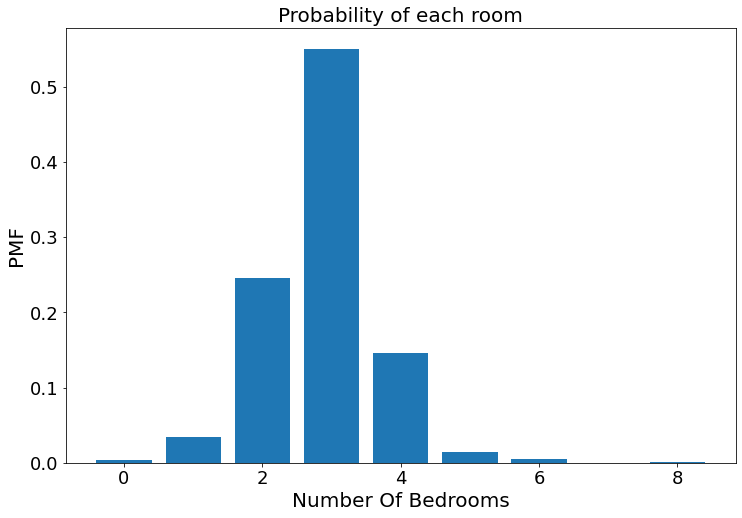

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
pmf = Pmf.from_seq(df_house['BedroomAbvGr'])
pmf.bar()

label_graph(18 ,'Number Of Bedrooms' ,  'PMF' , 'Probability of each room' , 20 )

in the pervious picture you can see that the probability of finding house with 3 bedrooms around 55%

if you are working on kaggle you will not be able to use this package because Kaggle does not allow installation of this package 
Don't worry there is another way to know the probability by using seaborn 

C:\Users\Abdelrhman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


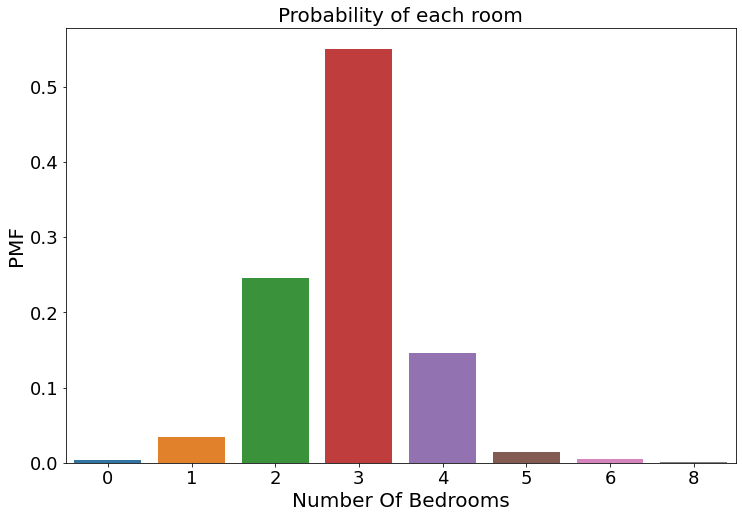

In [5]:
fig, ax = plt.subplots(figsize=(12,8))

probabilities = df_house['BedroomAbvGr'].value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)

label_graph(18 ,'Number Of Bedrooms' ,  'PMF' , 'Probability of each room' , 20 )

PMF has limitations in dealing with many unique values. In the following picture, you will see that there are many bars and you cannot determine the probability of each value, so if you want to deal with a column that contains many unique values or with continuous values such as prices, areas ... etc., you can use cumulative distribution function (CDF)

## 2- Cumulative distribution function (CDF)
#### What is Cumulative distribution function ?

CDF is another method to describe the distribution of continuous variables. The advantage of the CDF is that it can be defined for any kind of variable (discrete, continuous, and mixed).

if we want to know what the probability finding house with Sale price 100,000 or less 
on your own device you can use Cdf from empiricaldist package Like this :

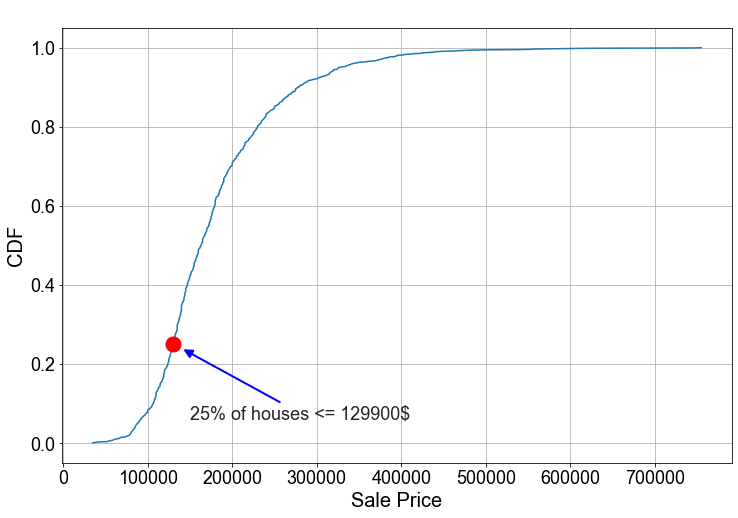

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("whitegrid")

cdf = Cdf.from_seq(df_house['SalePrice'])
cdf.plot()

ax.annotate("25% of houses <= 129900$ ", xy=(140000, 0.24), xytext=(150000, 0.06) , fontsize = 18 ,
            arrowprops={'arrowstyle': '-|>', 'lw': 2 , 'color' : 'b'})


plt.plot(129900 , 0.25 , marker = 'o' , color = 'r' , markersize = 15)
#plt.plot(100000 , 0.085 , marker = 'o' , markersize = 15)


label_graph(18 ,'Sale Price' ,  'CDF'  , " " ,  20 )

As you can see in the graph above, we have a 25% chance of finding a house that costs $129,900 or less.

For Cdf and Pmf in empiricalcdf package there is a great feature for example if you want to know what is the probability of a certain value you can pass this value to the variable cdf or pmf that you created earlier. And vice versa, that is, you can pass the probability and see its value , For example

In [7]:
print('The probability of 100000$ is : ' + str(cdf(100000)))
print("The value of probability 25% is : " + str(cdf.inverse(0.25)))

The probability of 100000$ is : 0.08424657534246575
The value of probability 25% is : 129900.0


There are two another way to plot Cdf one using function and other using seaborn 

Cdf using function : 

In [8]:
def cdf(data):
    """Compute CDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

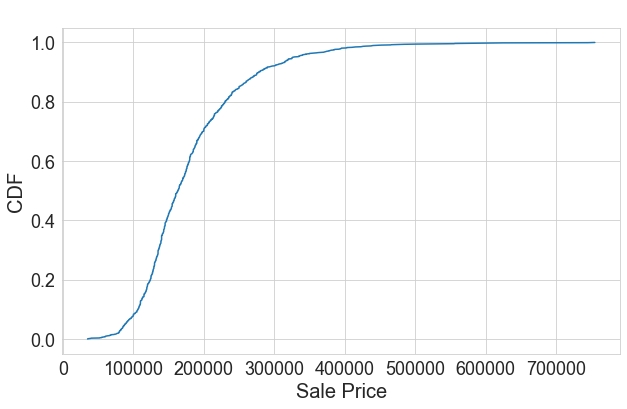

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
x_price , y_price = cdf(df_house['SalePrice'])
plt.plot(x_price , y_price)
label_graph(18 ,'Sale Price' ,  'CDF'  , " " ,  20 )

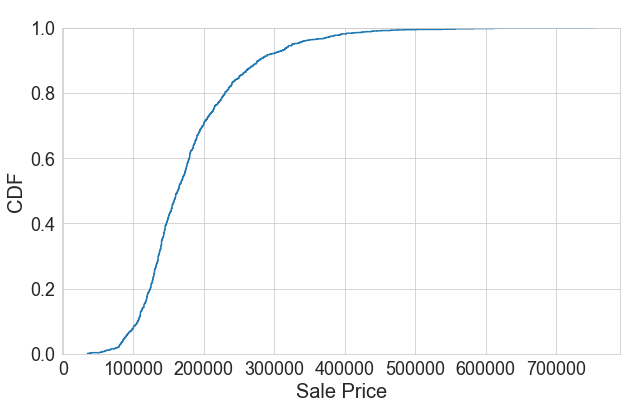

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

# Cdf using seaborn :
sns.ecdfplot(data=df_house, x="SalePrice")
#label axis
label_graph(18 ,'Sale Price' ,  'CDF'  , " " ,  20 )

## 3- Probability density function (PDF)
#### What is Probability density function ?
The probability density is a function that assigns the relative likelihood to each possible outcome . we will work on it later 

Great, now let's explain discrete probability distributions

# 1- Bernoulli Distribution 
This distribution is related to Binary classification . (i.e What is the probability that this person is sick or not? Or what is the probability that this customer will buy the product or not and so on)

In titanic dataset we want to know What is the probability that a person on the ship will survive?

C:\Users\Abdelrhman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


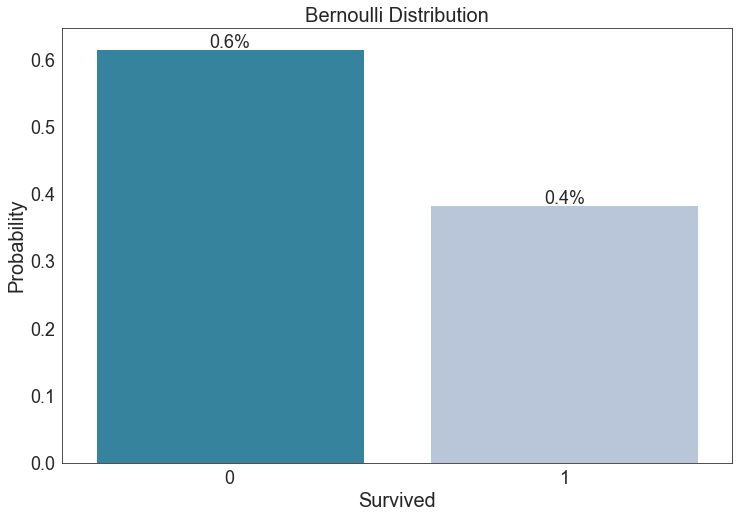

In [11]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,8))

# calculate the probability for each class 

# perform Bernoulli Distribution using empiricaldist package 
#pmf_survive = Pmf.from_seq(df_titanic['Survived'])
#pmf_survive.bar() 

#another way to perform Bernoulli 
probabilities = df_titanic['Survived'].value_counts(normalize=True)    
ax = sns.barplot(probabilities.index, probabilities.values, palette='PuBuGn_r')


# to write percentage on the top of bar 
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.001
    ax.annotate('{:.1f}%'.format(y), (x, y), ha='center' , fontsize = 18)

#plt.locator_params(integer = True) 

label_graph(18 ,'Survived' ,  'Probability'  , 'Bernoulli Distribution' ,  20 )

0 refer to Not survive 

1 refer to survive 

The probability that a person will not survive is higher than the probability that he will survive

# 2- Binomial Distribution 

The binomial distribution is the discrete probability distribution of the number of successes in a sequence of n independent experiments . it is frequently used to model the number of successes in a sample of size n drawn with replacement from a population of size N

Let's explain that defination 

In any experiment, the outcome of this experiment is either success or failure, and in the probability distributions, we are the ones who determine success from failure according to what we interest 

for example, If we take a random sample of 10 people who survived the Titanic, what is the probability that we will find 3 or 4 men in this sample?

In this example, I am interested in knowing . What is the probability of finding a certain number of men in the sample that i drew? This is considered success for me, and failure is that the sample contains women.

#### The probability of success = p

#### the probability of failure is 1 - p 

Mathematical Formula for Binomial Distribution is : 

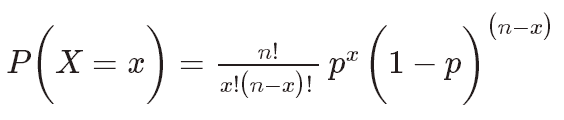

Where :

n : Sample data

x : The number that we predict (We want to know what is the probability of finding one or more men in the sample)

p : percentage of  the success that we have determined based on what we care about (here we care about men) in population data

In [12]:
#get percentage for each class
survived = df_titanic[df_titanic['Survived'] == 1]
survived['Sex'].value_counts(normalize = True

female    0.681287
male      0.318713
Name: Sex, dtype: float64

[0.02446194 0.10990147 0.22219211 0.26620117 0.20929585]


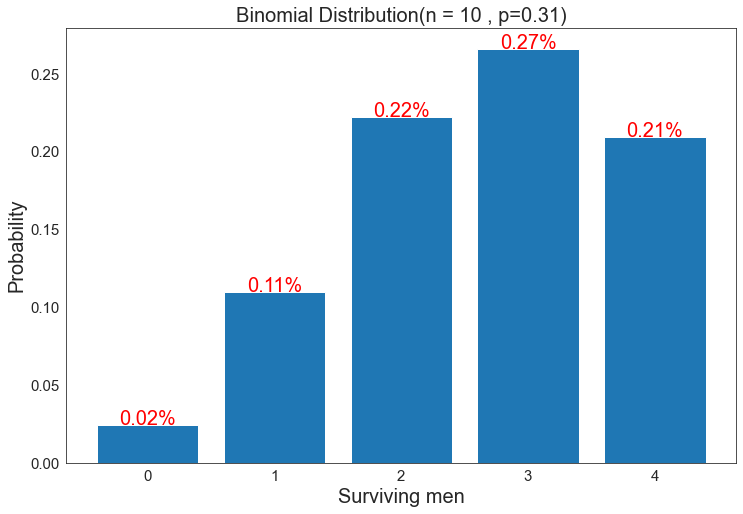

In [13]:
n = 10      # sample data
p = 0.31    # percentage of male in data 
x = np.arange(0 , 5)

fig, ax = plt.subplots(figsize=(12,8))

# calculate and plot binomial distribution
pmf = stats.binom.pmf(x , n , p)
pps = plt.bar(x , pmf)
print(pmf)

# write percentage on the top of bar 
for w in pps:
    height = w.get_height()
    ax.text(x=w.get_x() + w.get_width() / 2, y=height+.0001 ,
            s="{}%".format(round(height ,2)),ha='center' , fontsize=20 , color = 'r')

# convert x-axis from float type to int type
plt.locator_params(integer = True)

# label the axis
label_graph(15 ,'Surviving men' ,  'Probability'  , f"Binomial Distribution(n = {n} , p={p})" ,  20 )

# 3- Multinomial Distribution :

In a binomial distribution we always have two classifications (we can say that it is a Bernoulli process) and we are interested in knowing details about one of the two classifications (that is, we were interested in knowing the number of men in the sample)

But what if we want to know the probability of more than one event occurring?

To take an example, we will work on data that record traffic violations, and in this data there is a column that contains the gender of the person who committed the violation (black - white - Hispanic - Asian - other)

For example, if we draw again a random sample equal to 10, what is the probability that in this sample there will be 5 white people, 2 black people, and 3 Asian people ?

#### Calculate the percentage for each gender first 

In [ ]:
df_police['driver_race'].value_counts(normalize = True)

##### Note the order in the elements x and p, the first element in x is the number of white people, the first element in p is the percentage of the number of white people in the data, and the sum of the elements of x must be equal to the random sample

In [ ]:
stats.multinomial.pmf(x = [5 , 2 , 3] , n = 10 , p=[0.7 , 0.14 , 0.02])

# 4- HyperGeometric Distribution :

Before diving into the hypergeometric, we have an important question that we want to answer.

##### What is the difference between Binomial and hypergeometric distribution?

The main difference between both distributions is the principle of replacement . 

##### What is the principle of replacement ?

Suppose we want to calculate the average weights of students in one of the universities the number of students in this university is equal to 10,000 students (population data), we will take a random sample of these students, suppose that this sample consists of 10 students. I return the first sample to the population data and draw another sample (I may get the same students again in this sample) and this is the principle of replacement. I have the ability to take a sample of the population data and return it again to it

In the case of without replacement, if I took a random sample from the population data, I cannot return this sample once
For example, if we take a random sample of people and find that some of these people are infected with the Corona virus, will we leave these people and do the experiment again and take a new random sample of people, or will we place these infected people in quarantine? We will definitely isolate them. This is a hypergeomatics distribution

Let's summarize all of this before we do practical this distribution if you are just exploring on your data for example you want to know how many men in the sample , how many men survived the sinking of the Titanic or how many female employees got promoted in this position we will use the binomial distribution. But if you are going to take action based on this sample, for example, you withdraw the driver’s license from people who use drugs, or you isolate people infected with AIDS or Corona virus, in this case we will use the hypergeometric distribution

Let's explain this distribution on our data. In the Stanford Police Project's data, there is a column called drugs_related_stop. This column is recorded as whether the person is a drug addict or not. In this situation, we are supposed to apply a penalty to the abuser, whether by withdrawing the driver's license or applying a fine or imprisonment, so we will use a hypergeometric distribution

First, we will calculate the number of people using and not using drugs, from which we see that the number of drug users is 815

In [ ]:
df_police['drugs_related_stop'].value_counts()

Second, We use the hypergeometric function in scipy, and its parameters are

In [ ]:
x_hyper = np.arange(0, 8)
p = 91741 
N = 815
n = 10 

Where :

x_hyper : is the number of people we want to predict (we want to know how many people in the sample are likely to be drug users)

p : The population data

N : is the number of successes in the population (drug users)

n : Sample data

In [ ]:
fig = plt.figure(figsize =(15 , 8))
ax = fig.add_subplot(111)
ax.grid() 

geom = stats.hypergeom.pmf(x_hyper ,p , N, n)

ax.plot(x, geom, 'o' , color = 'b' , markersize = 15)
ax.vlines(x, 0, geom, lw=3 , color = 'black')

# label the axis
label_graph(15 , 'drugs related stop' , 'hypergeom PMF' ,'Hypergeomatric Distribution' ,  20 )

# 5- Geometric Distribution :
is a probability disceret distribution represent number of failures before you get a success in a series of Bernoulli trials (success or failure of the experiment) Once again, you are determine the success or failure of the experiment

If we want to know what is the probability of Cristiano Ronaldo scoring the second penalty kick. In this situation we can use the geometric distribution

The equation for this distribution is:
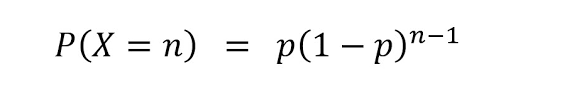

Where :
##### n = Number of trial 
##### P = Probability of success 




Cristiano Ronaldo has a penalty score of 0.83 (p = 0.83)

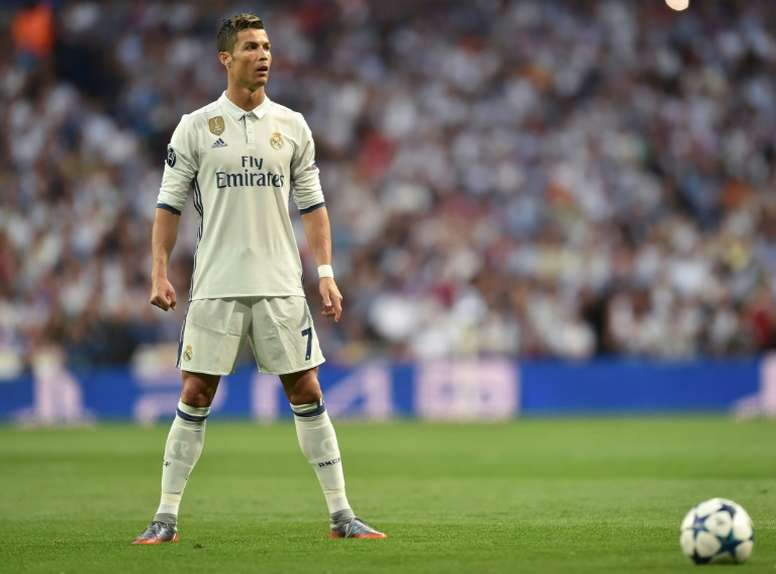

We will also see the possibility of Cristiano scoring the third and fourth kicks

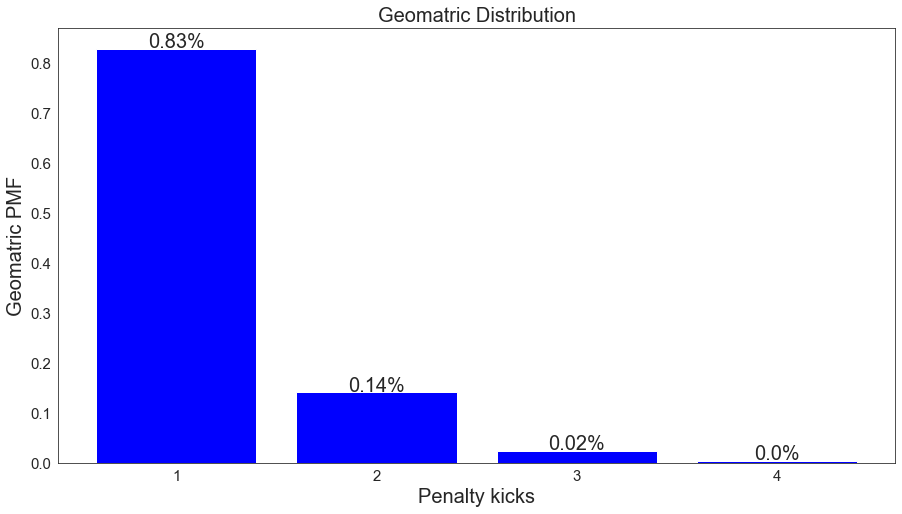

In [14]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,8))

for number in range(1 , 5):
    probability = stats.geom.pmf(k=number, p=0.83)
    pps = ax.bar(number , probability , color = 'b')
    ax.locator_params(integer=True)
    
    
    for p in pps:
        height = p.get_height()
        ax.text(x=p.get_x() + p.get_width() / 2, y=height+.002 , s="{}%".format(round(height ,2)),ha='center' , fontsize=20)

        
# label the axis
label_graph(15 , 'Penalty kicks' , 'Geomatric PMF' ,'Geomatric Distribution' ,  20 )

As you can see, the probability of Ronaldo scoring the second penalty kick = 0.14%

## 6- Uniform distribution : 
When all events have the same probability of happening, then our distribution is uniform distribution 

For example, the probability that you will or will not be accepted for a new job or a new scholarship is 50 to 50.Also, when a dice is thrown, the probability that each of the six faces of the dice will appear is equal 1/6 (0.16%)

you can perform this distribution using Pmf from empiricalcdf or using seaborn
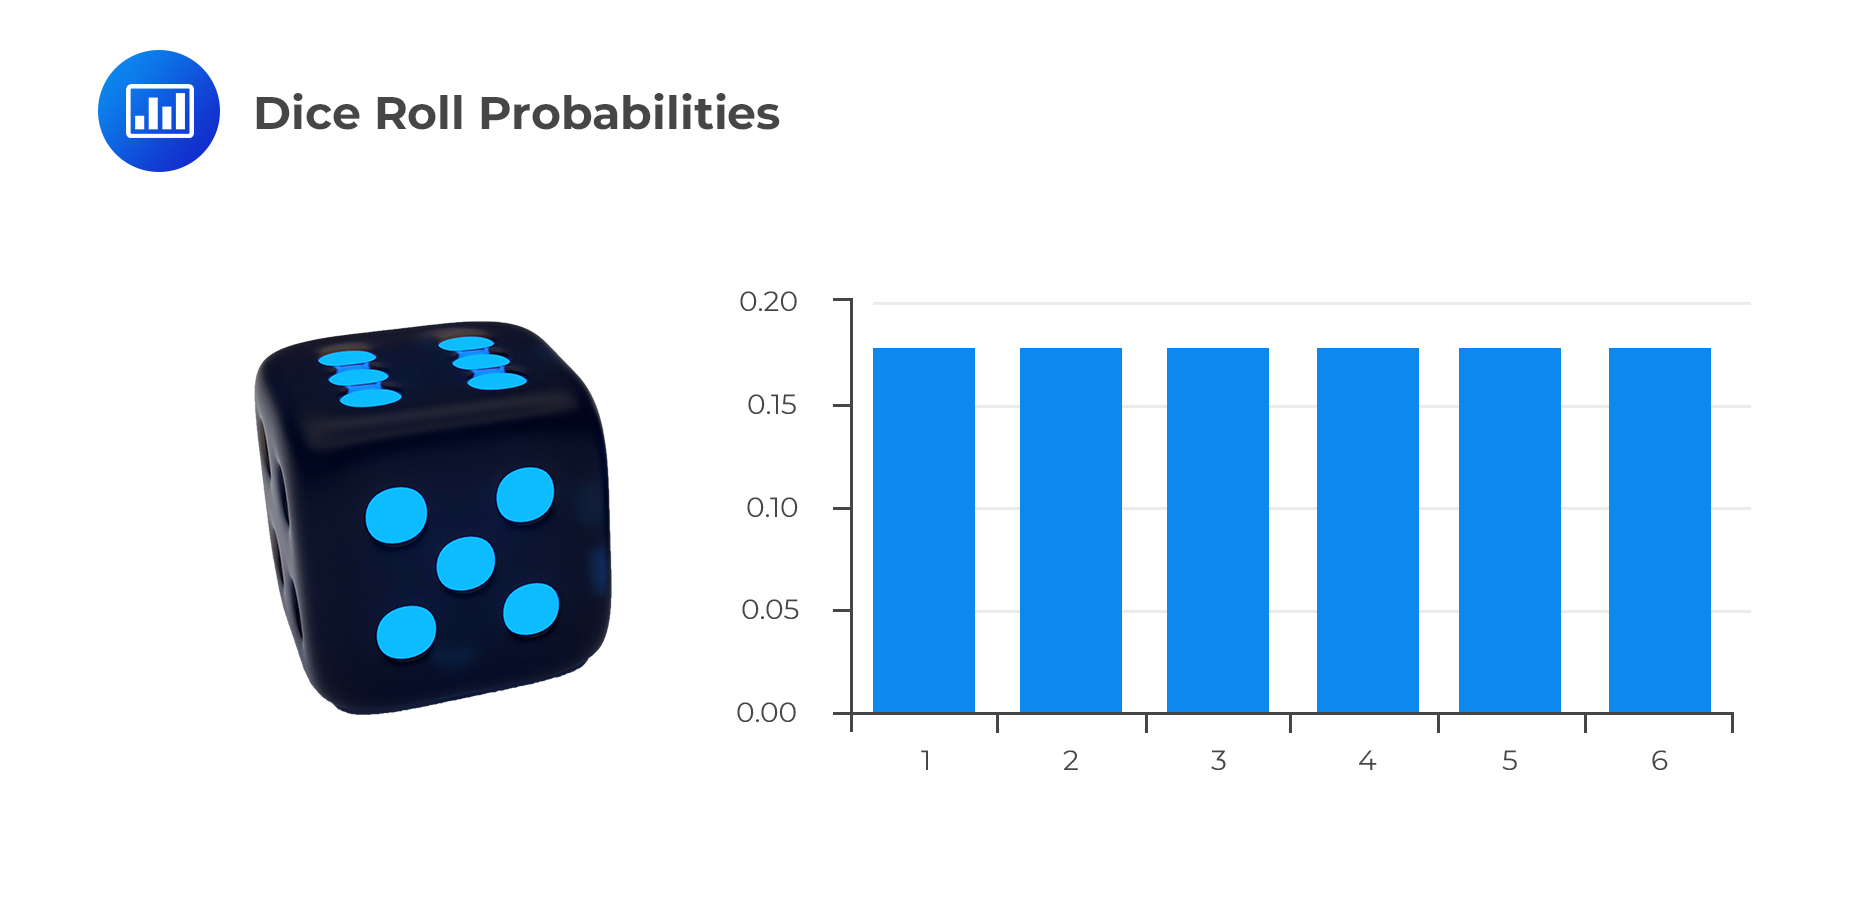

# 7- Poisson Distribution :
is a probability disceret distribution that is used to show how many times an event is likely to occur over a specified period

If we want to know what is the probability that a traffic officer will stop a one or two or more drivers over a specified period of time (assuming throughout the day), in this case we will use the Poisson distribution

Poisson distribution equation is : 
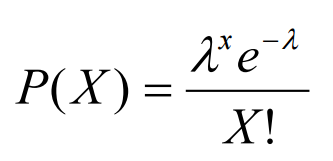

##### Where :
μ = 1 / λ (average number of event)

x = (the number of event)

e = 2.71828 (e is Euler’s number, a constant)

 We will work on such data Stanford Open Policing Project dataset
###### Step 1 :
we filter the data to include from 1/10/2005 to 7/10/2005 

In [15]:
police = df_police[(df_police['stop_date'] >= '2005-10-01') & (df_police['stop_date'] <= '2005-10-07')]
police.tail()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
215,2005-10-07,19:35,NaN,F,1978.0,27.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
216,2005-10-07,20:30,NaN,F,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
217,2005-10-07,21:55,NaN,M,1977.0,28.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
218,2005-10-07,22:55,NaN,M,1982.0,23.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
219,2005-10-07,23:30,NaN,M,1986.0,19.0,White,Suspicious Person,Other,True,Probable Cause,Arrest Passenger,True,16-30 Min,True


###### Step 2 :
We combine the date column with the time column and make them into one column

In [16]:
police['Stop_date'] = police['stop_date']+ ' ' + police['stop_time']

C:\Users\ABDELR~1\AppData\Local\Temp/ipykernel_8304/4174955447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police['Stop_date'] = police['stop_date']+ ' ' + police['stop_time']


##### Step 3 :
We convert Stop_date column type from object to datetime64

In [17]:
police['date_time'] = pd.to_datetime(police['Stop_date'] , format = '%Y/%m/%d %H:%M')

C:\Users\ABDELR~1\AppData\Local\Temp/ipykernel_8304/3643448061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police['date_time'] = pd.to_datetime(police['Stop_date'] , format = '%Y/%m/%d %H:%M')


##### step 4 :
We add two columns to the data set, a column for the time when the stop occurred, and a column for the day

In [18]:
police['Hour'] = police['date_time'].dt.hour
police['day'] = police['date_time'].dt.day

C:\Users\ABDELR~1\AppData\Local\Temp/ipykernel_8304/2431999200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police['Hour'] = police['date_time'].dt.hour
C:\Users\ABDELR~1\AppData\Local\Temp/ipykernel_8304/2431999200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police['day'] = police['date_time'].dt.day


A note on how to calculate the average of events in a given time period.For example, if you want to calculate the probability of an earthquake in the next year and you have historical data about this event, you will calculate the average earthquakes in previous years (by calculating the number of earthquakes that occurred in each month of this year) and then make a prediction
Also, if you want to calculate the probability of a particular event occurring in the next month and you have historical data, you calculate the average of events in each of these months (by calculating the number of events that occurred on each day of this month and calculating the average of events in this month) as We did now

###### step 5 :
calculate the number of stops for each day and change the name of the hour column to stops

In [19]:
stops = pd.DataFrame(police.groupby('day')['Hour'].value_counts())
stops.rename(columns = {'Hour':'Stops'}, inplace = True)

###### Step 6 :
Calculating average stops for each day

In [20]:
stops.groupby('day')['Stops'].mean()

day
1    2.000000
2    2.000000
3    1.583333
4    2.181818
5    1.800000
6    1.937500
7    1.533333
Name: Stops, dtype: float64

As you can see that the average stops per day is 2 (of course we round the decimal numbers to become a integer number)

###### step 7 :

perform and plot poisson distribution

[0.13533528 0.27067057 0.27067057 0.18044704 0.09022352 0.03608941]


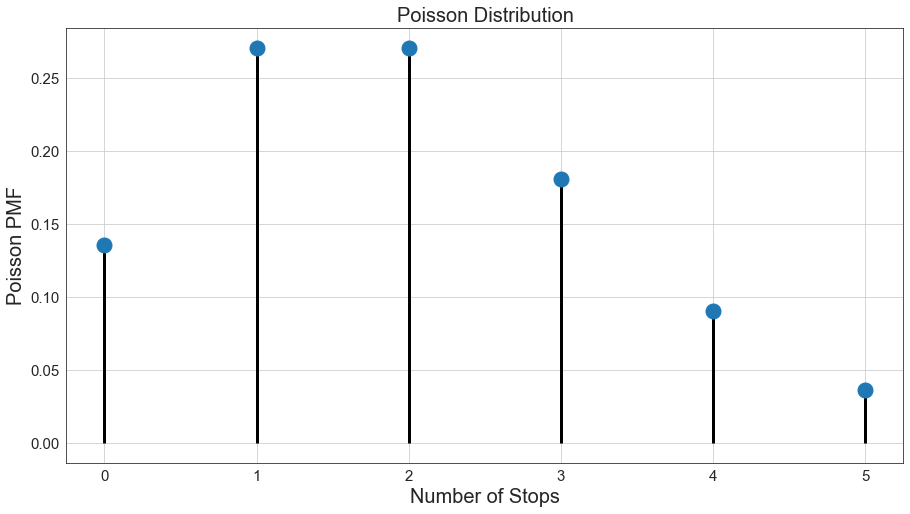

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
ax.grid()

number_of_stops = np.arange(0, 6)
poiss = stats.poisson.pmf(k=number_of_stops, mu=2)
print(poiss)


ax.plot(number_of_stops, poiss , 'o' , ms = 15)
ax.vlines(number_of_stops, 0 , poiss , colors='Black' , lw = 3)

# covert x-axis from float to integer
ax.locator_params(integer=True)

# label the axis
label_graph(15 , 'Number of Stops' , 'Poisson PMF' ,'Poisson Distribution' ,  20 )

Great effort, now let's talk about continuous probability distributions

# Exponential Distribution

In [ ]:
police = df_police[(df_police['stop_date'] >= '2005-10-01') & (df_police['stop_date'] <= '2005-10-07')]

In [ ]:
police['Stop_date'] = police['stop_date']+ ' ' + police['stop_time']

police['Date']=pd.to_datetime(police['Stop_date'], format='%Y/%m/%d %H:%M')

police['Date'].mean()

In [ ]:
police['Day'] = police['Date'].dt.day
police['Weekday'] = police['Date'].dt.dayofweek
police.head()

#0=Monday
#1=Tuesday
#2=Wednesday
#...
#6=Sunday


In [ ]:
exp = stats.expon.cdf(police['Day'], scale=4)
#print(y3)

fig, ax = plt.subplots(figsize=(15,8))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.plot(police['Day'], exp) 
plt.xlabel('Traffic violations (in week)' , fontsize = 20)
plt.ylabel('Probability' , fontsize = 20)
plt.title('Exponential distribution' , fontsize = 20)
plt.show()

# 8- Normal distribution :
The normal distribution is a continuous probability distribution that is symmetrical around its mean, most of the observations cluster around the central peak. in Normal distribution the mean is equal to median . it's also known as the Gaussian distribution

In the following graph, you can see some shapes of data and and properties of each shape :

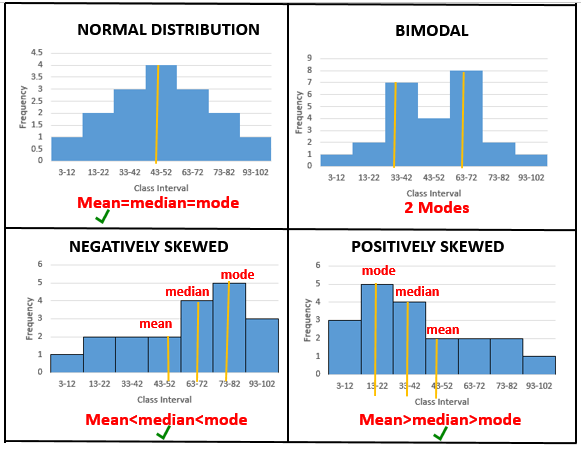

In continuous variables , we can use either CDF or PDF to give us a probability for each value. The last time we used CDF , this time we will use PDF (we will use seaborn to display PDF of continuous variables)

The following graph show the Cdf of Normal distribution :
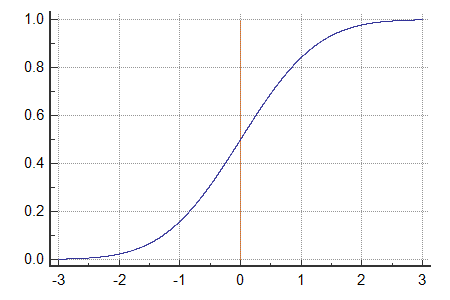

Let's work now , We will work on the data of the Rio de Janeiro Olympics 2016. And we will show the heights of volleyball and basketball players

In [22]:
sports_hall = ['Volleyball' , 'Basketball']
basket_volley = df_olympic[(df_olympic['Year'] == 2016) & df_olympic['Sport'].isin(sports_hall)]

C:\Users\Abdelrhman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


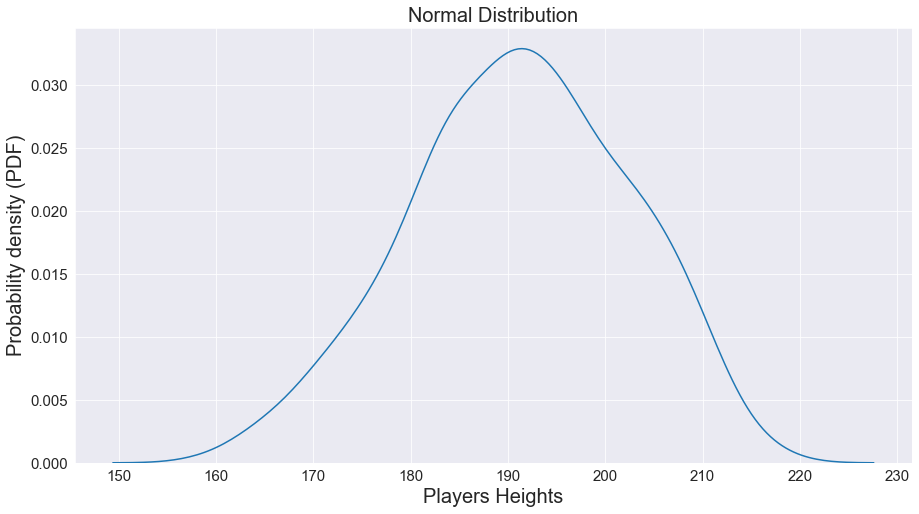

In [23]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(basket_volley['Height'] , kde = True , hist = False)

# label the axis
label_graph(15 , 'Players Heights' , 'Probability density (PDF)' ,'Normal Distribution' ,  20 )

In [ ]:
np.std(basket_volley['Height'])

As you can see, these data are distributed in a normal distribution, and the y-axis represents the probability. 

For example, the probability of finding a player with a height of 190 meters (the average height of the players) is around 0.035 and its on.

Also we can use Cdf to represent this data 

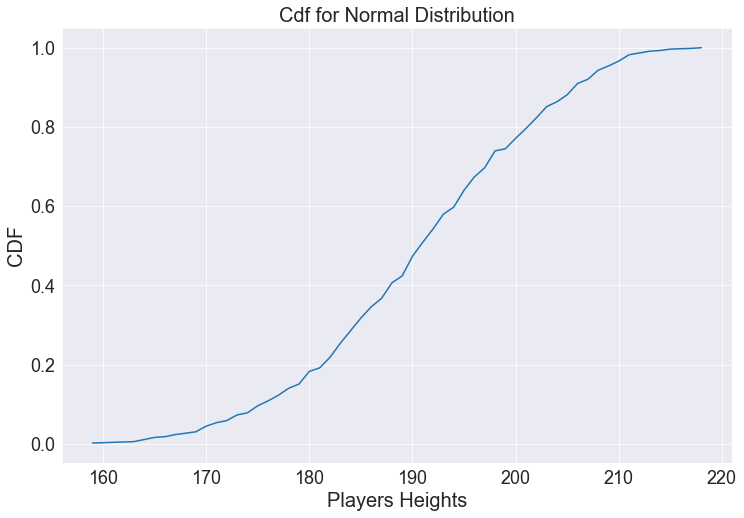

In [24]:
fig, ax = plt.subplots(figsize=(12,8))

players_heights = Cdf.from_seq(basket_volley['Height'])
players_heights.plot()

# label the axis
label_graph(18 , 'Players Heights' , 'CDF' ,'Cdf for Normal Distribution' ,  20 )

## Normality test
We just talked about the normal distribution, but what if we want to know whether our data follows the normal distribution or not?

We can test the Normality in many ways, but we will focus on visualization only this visualize called quantile-quantile or Q - Q plot 

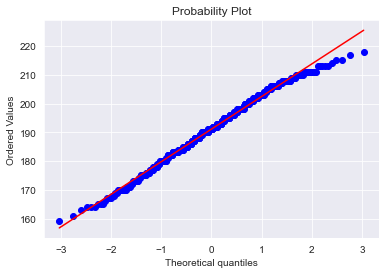

In [25]:
stats.probplot(basket_volley['Height'], dist = 'norm' , plot=plt) 
plt.show()

The blue dots represent our data and the diagonal line represents the normal distribution. If the data points follow the diagonal line, the data will be normally distributed. The further away the data points are from the diagonal line, the farther our data is from the normal distribution. In the graph above, our data follows the diagonal line, so it is Normally distributed, but in the following graph.

let's see another example.

C:\Users\Abdelrhman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

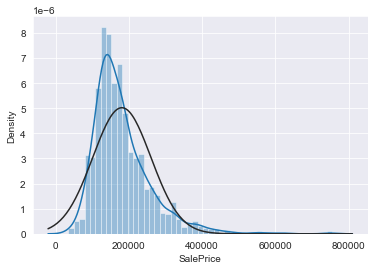

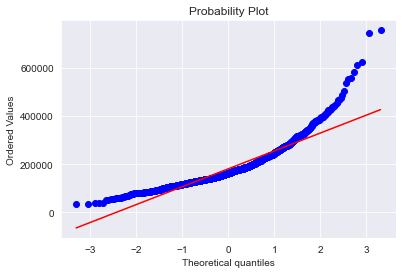

In [26]:
sns.set_style("darkgrid")
sns.distplot(df_house['SalePrice'], fit=stats.norm)
fig = plt.figure()
stats.probplot(df_house['SalePrice'], plot=plt)

the data points do not follow the diagonal line, so they do not follow the normal distribution. the distribution of this data is lognormal distribution

## Normal Versus Lognormal distribution 
Both normal and lognormal distributions are used in statistical mathematics to describe the probability of an event occurring.
But there are many difference between them 

1- The shape of normal distribution is symmetric distribution whereas the lognormal distribution shape is positive distribution, they create a right-skewed curve. 

2 - In the normal distribution The mean , the median and the mode are all the same whareas in lognormal  mean > median > mode 
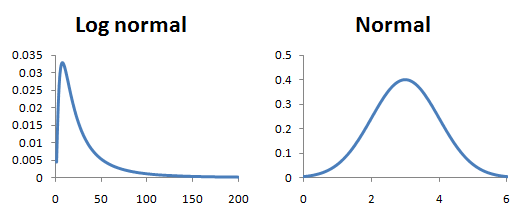

Let's see the lognormal distribution from our data


### Why we need to transform lognormal distribution to normal distribution ?
Now you know that the natural logarithm is skewed to the right, and this is not good for us, because we will enter this data later into a model for machine learning, and the skewed data has some negative effects on our data and on the model,

for example:

1- When your data is skewed, the average of the data is different from the median, and this can make the mean misleading because the values are not close to the mean

2- The skewed data causes outliers values, which lead to spoil and mislead the training process resulting in longer training times, less accurate models and ultimately poorer results. for example , in linear regression model it can change the model equation completely i.e. bad prediction or estimation 

In order to transform lognormal distribution to a normal distribution We take the log of each point in our data 

C:\Users\Abdelrhman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3982622308161888, 12.024050901109383, 0.9953761475636613))

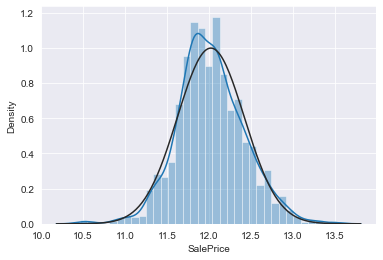

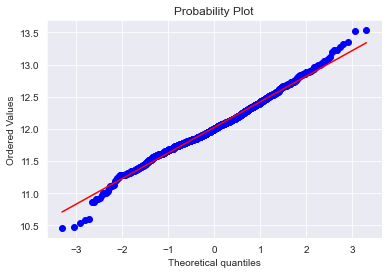

In [27]:
df_house['SalePrice'] = np.log(df_house['SalePrice'])
sns.distplot(df_house['SalePrice'], fit= stats.norm)
fig = plt.figure()
stats.probplot(df_house['SalePrice'], plot=plt)

Another code to perform Q-Q plot :

In [ ]:
import statsmodels.api as sm
fig = sm.qqplot(df_house['SalePrice'], line='s')
plt.show()

## 9- Student's t (T-Distribution) :
Student's T or T-distribution is a continuous probability distribution and is a way of describing data that follow normal distribution 

the t-distribution is used to:

Find the critical values for a confidence interval when the data is approximately normally distributed.
used in t-tests and regression analysis.

There are several conditions for using T-Distribution:

1-Data follows a normal distribution.

2-The sample size should be less than 30.

3-The population variance or standard deviation is unknown (The variance in a t-distribution is estimated based on the degrees of freedom of the data set (total number of observations minus 1).

If we know the population standard deviation , we can use a z-distribution (we will apply a z-distribution)

## 10- Standard normal distribution (Z-Distribution) :
Standard normal distribution also called Z-distribution is a continuous probability distribution and is a special normal distribution where the mean of the Z-distribution is always 0 and the standard deviation = 1.

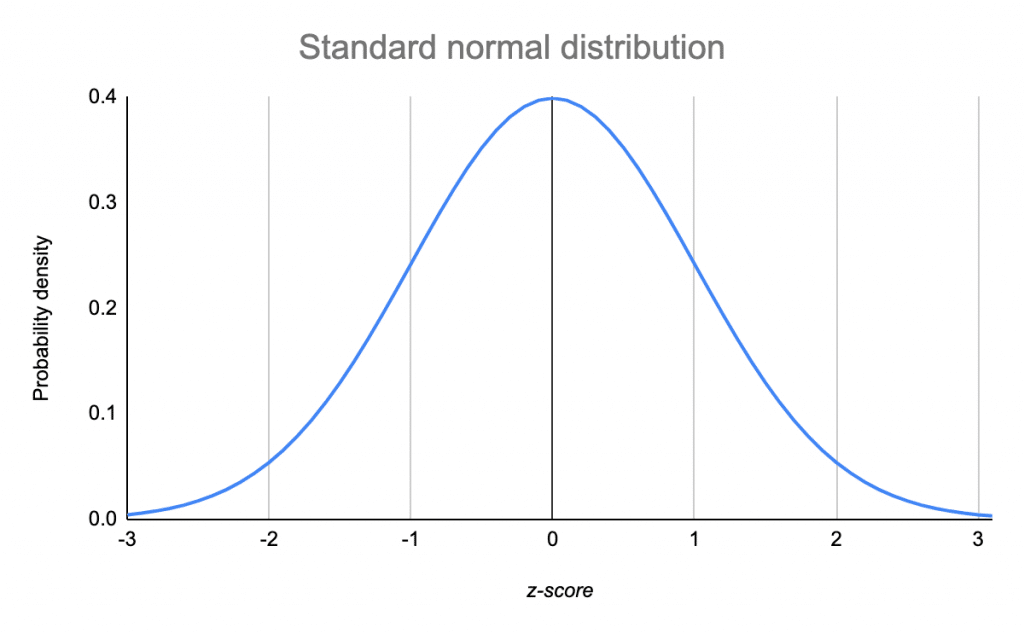
Any normal distribution can be converted to a Z-distribution by converting its values into a z-score . A z-score gives you an idea of how far from the mean a data point is.

if value above the mean the z-score is positive and negative if it lies below the mean 

Z-score equation : 

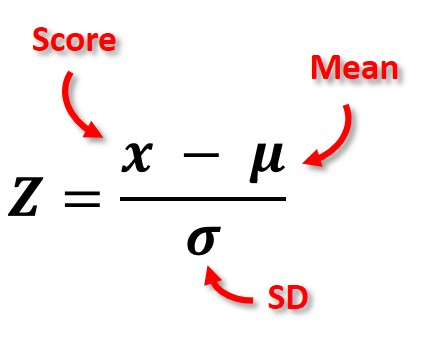
Let's take an example of the Z-distribution (we will work on the heights of the players)
If we draw a player at randomlly. What is the probability that the height of the player will be above than 195 centimeters ?

First , Determine two parameters:

1-Mean of data (here , the average height of the players)

2-the standard deviation


In [28]:
mu = np.mean(basket_volley['Height'])
std = np.std(basket_volley['Height'])

cdf_195 = stats.norm(loc = mu , scale = std).cdf(195)
probability = 1- cdf_195
print('The probability is {} or {}%'.format(round(probability , 2) , round(probability*100 , 2)))

The probability is 0.37 or 36.63%


Another example:

What is the probability that the height of the player will be smaller than 170 centimeter ?

In [30]:
prob = stats.norm(loc = mu , scale = std).cdf(170)
print('The probability is {} or {}%'.format(round(prob , 2) , round(prob*100 , 2)))

The probability is 0.03 or 3.11%


last example:

what is the probability that the height of the player will be between 170 and 185 centimeter ?

In [32]:
cdf_upper = stats.norm(loc = mu , scale = std).cdf(185)
cdf_lower = stats.norm(loc = mu , scale = std).cdf(170)
 
prob = cdf_upper - cdf_lower
print('The probability is {} or {}%'.format(round(prob , 2) , round(prob*100 , 2)))

The probability is 0.26 or 26.32%


## 11- Pareto distribution :

The Pareto Distribution was named after Italian economist and sociologist Vilfredo Pareto. It is sometimes referred to as the Pareto Principle or the 80-20 Rule.

In Pareto distribution, we pay attention to the most common problems and solve them.For example, in one of the agricultural countries, the farmers complain about some agricultural problems to the government to solve these problems. The government collected the various complaints of the farmers and we found that 97 of the farmers complain about the quality of the fertilizers, 140 about the irrigation systems, 58 about the agricultural seeds, 6 about the scarcity of water and 17 about the salinity of the soil. 

##### step 1 :
first create the data using dataframe

In [6]:
data = pd.DataFrame({'Count' : [97 , 140 ,58 , 6 , 17]})
data.index = ['compost quality' , 'irrigation network' , 'agricultural seeds' , 'Water scarcity' , ' soil salinization']

##### step 2 :
arrange the problems in descending order and then calculate the cumulative percentage

In [8]:
#sort DataFrame by count descending
data = data.sort_values(by='Count', ascending=False)

#add column to display cumulative percentage
data['cumulative'] = data['Count'].cumsum()/data['Count'].sum()*100

###### Step 3 :
plot a Pareto graph

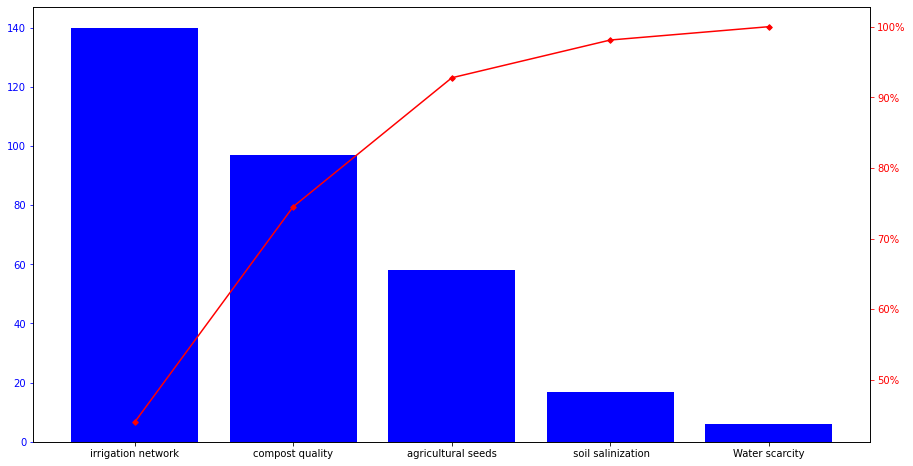

In [23]:
fig, ax = plt.subplots(figsize = (15 , 8))
ax.bar(data.index, data['Count'], color='b')

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(data.index, data['cumulative'], color='r', marker="D", ms=4)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors='b')
ax2.tick_params(axis='y', colors='r')

#display Pareto chart
plt.show()

As you can see in the graph above, we will give our full attention at the beginning to solve the problem of irrigation networks and compost quality

You can also implement a Pareto chart directly through this package :
https://pypi.org/project/paretochart/?fbclid=IwAR3lovL5j4qyirC3vCBbd1pRXDX7qdyy6RehhGHREGAFq8J8nzCOXq0VOaw

We did a great job together on probability distributions and now you have learned some concepts that can help you in your own business and projects. I hope you enjoyed this notebook and remember that there is more to learn in statistics and probability to be a unique data scientist.